In [120]:
# Load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#import classification_report
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
#Area under ROC curve
from sklearn.metrics import roc_auc_score
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

In [121]:
# Load the data from the csv file
df = pd.read_csv('../data/gardening_crops.csv')
df.head()

,Temperature,PH,Soil,Waterlevel,Space,Label
0,31.123421,6.5,Well-drained Sandy Soil,High,0.025,Raddish
1,31.023871,6.0,Well-drained Sandy Soil,High,0.026,Raddish
2,29.075632,7.0,Well-drained Carbonic Soil,Moderate,0.027,Raddish
3,31.076125,7.5,Well-drained Sandy Soil,High,0.028,Raddish
4,31.165421,6.8,Well-drained Sandy Soil,High,0.029,Raddish


# We are going to create a KNN model that groups the plants (Label Column) based on the features (all other columns)

In [122]:
# Check the data types
df.dtypes

Temperature    float64
PH             float64
Soil            object
Waterlevel      object
Space          float64
Label           object
dtype: object

In [123]:
# Here, we can see that the Soil, Waterlevel, and the Label columns are of type object.
# Let's see if we can convert them to numeric values.
# We can use the unique() method to see the unique values in the column.
df['Soil'].unique()

array(['Well-drained Sandy  Soil', 'Well-drained Carbonic Soil',
       'Well drained Carbonic Soil', 'Loamy Sandy Soil',
       'Well drained Loamy Sandy Soil',
       'Well-drained Deep Fertile Loamy Soil ',
       'Well drained Loamy Soil ', 'Well-drained Loamy Soil ',
       'rich humus well drained carbonic Soil',
       'Well drained carbonic soil', 'Well drained Loamy Soil',
       'Well drained Loamy  Soil', 'Well drained Red Podzolic soil ',
       'Well drained  Sandy Loamy Soil', 'Well drained Sandy Loamy Soil',
       'Well drained Carbonic Loamy Sandy Soil',
       'Well drained  Loamy Sandy Soil',
       'Well drained Carbonic Loamy Clay Soil',
       'Well drained Loamy Clay Soil', 'Moisturized Soil',
       'Well drained acidic soil ', 'Well drained soil soil ',
       'Well drained soil', 'Well drained soil ',
       'Well drained  acidic soil', 'Well drained  soil',
       'Well drained   soil', 'Light Well drained  Soil',
       'Well drained Carbonic soil', 'Well dr

In [124]:
df['Waterlevel'].unique()

array(['High', 'Moderate', 'Low'], dtype=object)

In [125]:
# Our features are all of the columns except the Label column.
features = df.columns[:-1]
df_features = df[features]

df_features.head()

,Temperature,PH,Soil,Waterlevel,Space
0,31.123421,6.5,Well-drained Sandy Soil,High,0.025
1,31.023871,6.0,Well-drained Sandy Soil,High,0.026
2,29.075632,7.0,Well-drained Carbonic Soil,Moderate,0.027
3,31.076125,7.5,Well-drained Sandy Soil,High,0.028
4,31.165421,6.8,Well-drained Sandy Soil,High,0.029


In [130]:
# Create a LabelEncoder object
le = LabelEncoder()

# Encode the Soil column
df_features['Soil'] = le.fit_transform(df_features['Soil'])
df['Soil'] = le.fit_transform(df['Soil'])

# Encode the Waterlevel column
df_features['Waterlevel'] = le.fit_transform(df_features['Waterlevel'])
df['Waterlevel'] = le.fit_transform(df['Waterlevel'])

C:\Users\krish\AppData\Local\Temp\ipykernel_7844\889998279.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features['Soil'] = le.fit_transform(df_features['Soil'])
C:\Users\krish\AppData\Local\Temp\ipykernel_7844\889998279.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features['Waterlevel'] = le.fit_transform(df_features['Waterlevel'])


In [131]:
df_features.dtypes

Temperature    float64
PH             float64
Soil             int64
Waterlevel       int64
Space          float64
dtype: object

f:\SFGardens\env\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


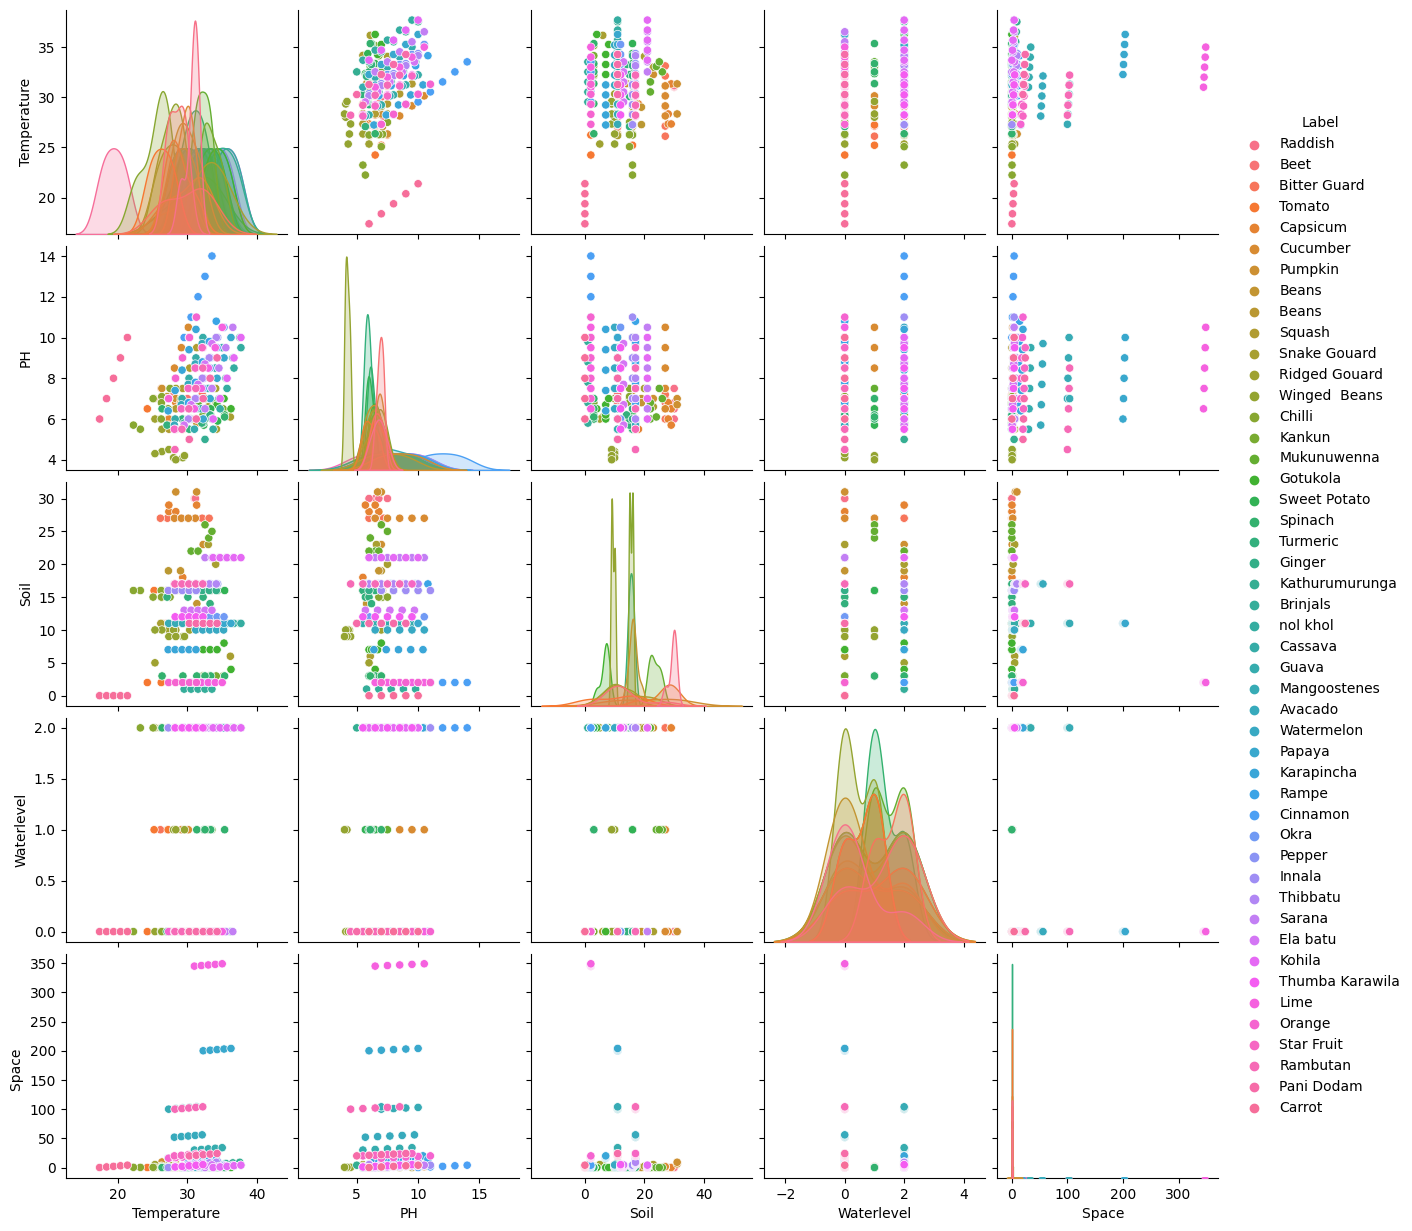

In [133]:
# Pair plot and save the figure
feature_columns = df_features.columns
sns.pairplot(df, x_vars=feature_columns, hue='Label', size=2.5)

# save the figure
plt.savefig('../images/pairplot.png')

In [134]:
df_features.shape
# We have 248 rows and 5 columns.

(248, 5)

In [135]:
# Let's create X and y variables for our model.
X = df_features
y = df['Label']

In [136]:
# Convert the labels to numeric values
le = LabelEncoder()
y = le.fit_transform(y)

In [137]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Using hyperparameter tuning to find the best K value using GridSearchCV

In [138]:
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}

In [139]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

f:\SFGardens\env\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [140]:
knn_cv.best_score_

0.7382857142857142

In [141]:
# In this case, we got the best score as 1
knn_cv.best_params_

{'n_neighbors': 1}

In [142]:
# Training and testing the model
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 


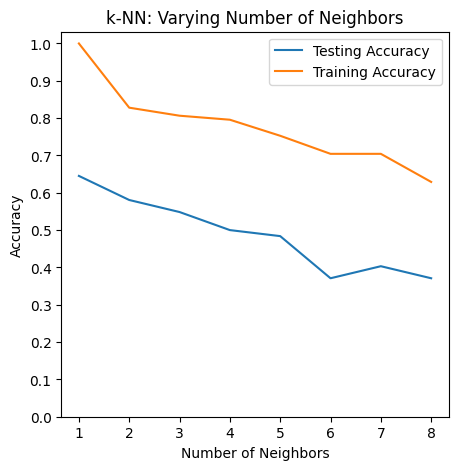

In [147]:
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.yticks(np.arange(0,1.05, 0.1))
plt.savefig('../images/knn_accuracy.png')
plt.show()

In [148]:
#Setup a knn classifier with k neighbors = 1 from the above graph
knn = KNeighborsClassifier(n_neighbors=1)

In [149]:
#Fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [150]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
knn.score(X_test,y_test)

0.6451612903225806

In [151]:
# Plot the confusion matrix
y_pred = knn.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 2, 0, 1],
       [0, 0, 0, ..., 0, 3, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

In [152]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,1,3,4,6,7,8,9,10,11,12,...,35,37,38,39,40,42,44,45,46,All
True,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,3
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
7,0,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
9,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
11,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


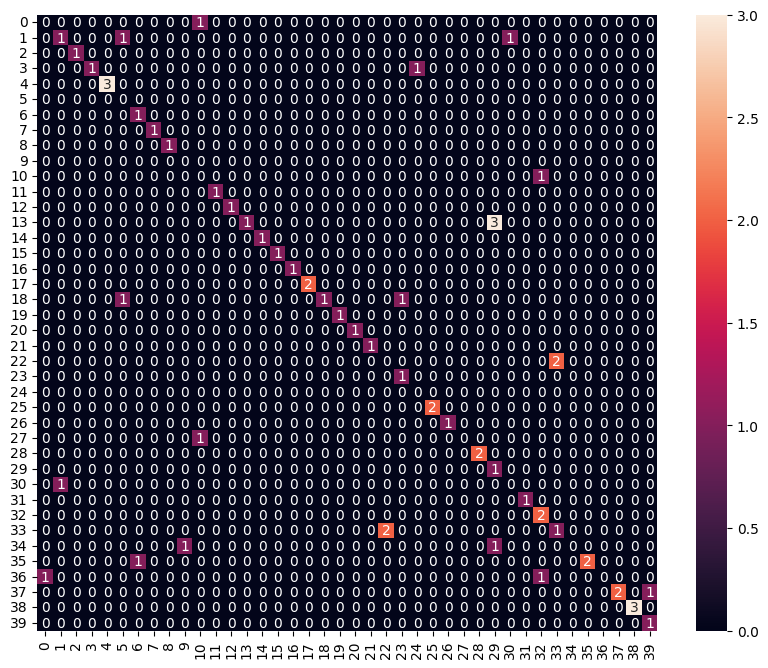

In [162]:
# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.savefig('../images/confusion_matrix.png')

In [163]:
# Plot the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           3       0.50      0.33      0.40         3
           4       1.00      1.00      1.00         1
           6       1.00      0.50      0.67         2
           7       1.00      1.00      1.00         3
           8       0.00      0.00      0.00         0
           9       0.50      1.00      0.67         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         1
          16       1.00      1.00      1.00         1
          17       1.00      1.00      1.00         1
          19       1.00      0.25      0.40         4
          20       1.00      1.00      1.00         1
          21       1.00      1.00      1.00         1
          22       1.00      1.00      1.00         1
          23       1.00    

f:\SFGardens\env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
f:\SFGardens\env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
f:\SFGardens\env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
f:\SFGardens\env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMe

In [164]:
# Plot the accuracy score for the model
print('Accuracy of K-NN classifier on training set: {:.2f}'
        .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
        .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.65


# XGBoost

In [153]:
# Create XGBoost specific DMatrix data format
# Convert data into DMatrix (optimized for XGBoost performance)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [154]:
# Define the model
xgb_model = XGBClassifier(max_depth=50, objective='multi:softmax', num_class = len(np.unique(y)))
# Train and evaluate.
# multiclass classification eval_metric ('merror', 'mlogloss')
evalmetric = 'merror'
xgb_model.fit(X_train, y_train, eval_metric=[evalmetric], eval_set=[(X_train, y_train),(X_test, y_test)], verbose=False)

f:\SFGardens\env\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=50, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_class=47,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [155]:
def visualize_acuracy(xgb, metric):
    # Plot and display the performance evaluation
    xgb_eval = xgb.evals_result()
    eval_steps = range(len(xgb_eval['validation_0'][metric]))
    fig, ax = plt.subplots(1, 1, sharex=True, figsize=(8, 6))
    ax.plot(eval_steps, [1-x for x in xgb_eval['validation_0'][metric]], label='Train')
    ax.plot(eval_steps, [1-x for x in xgb_eval['validation_1'][metric]], label='Test')
    ax.legend()
    ax.set_title('Accuracy')
    ax.set_xlabel('Number of iterations')
    # save the figure
    fig.savefig('../images/xgb_accuracy.png')


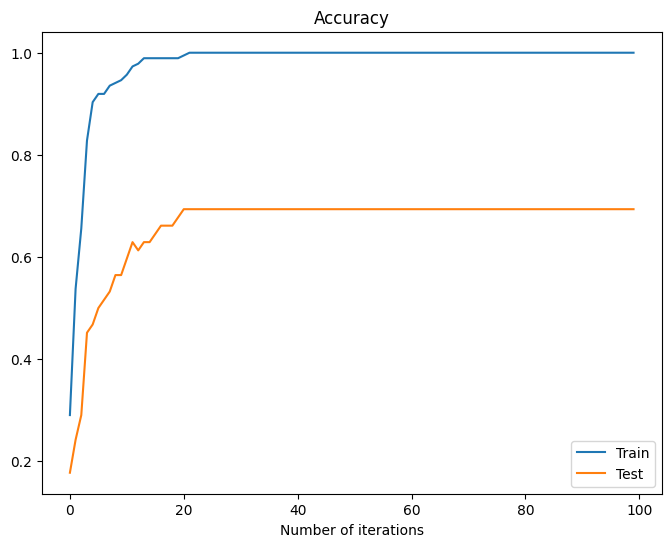

In [156]:
visualize_acuracy(xgb_model, evalmetric)

In [157]:
from sklearn.metrics import accuracy_score
def score_accuracy(xgb, X, y):
    # run trained model.
    y_pred = xgb.predict(X)
    # Check the accuracy of the trained model.
    accuracy = accuracy_score(y, y_pred)
    print("Accuracy: %.1f%%" % (accuracy * 100.0))

In [158]:
score_accuracy(xgb_model, X_test, y_test)

Accuracy: 69.4%


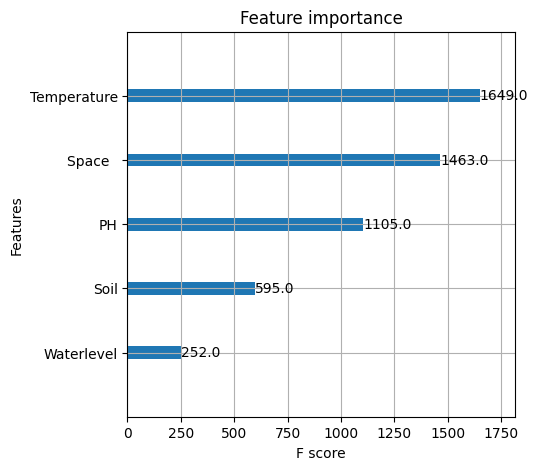

In [165]:
# Plot the importance of the features
xgb.plot_importance(xgb_model)
plt.rcParams['figure.figsize'] = [5, 5]
plt.savefig('../images/xgb_feature_importance.png')

In [159]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model, X, y, normalized=True, cmap='bone'):
    # run trained model.
    y_pred = model.predict(X)
    classes = np.sort(np.unique(y)) # depends (y should have all labels)
    # run trained model.
    cm = confusion_matrix(y, y_pred)
    # run trained model.
    plt.figure(figsize=[7, 6])
    norm_cm = cm
    if normalized:
        norm_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(norm_cm, annot=cm, fmt='g', xticklabels=classes, yticklabels=classes, cmap=cmap)
        plt.savefig('../images/confusion-matrix-xgboost.png')


C:\Users\krish\AppData\Local\Temp\ipykernel_7844\2647589164.py:13: RuntimeWarning: invalid value encountered in divide
  norm_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


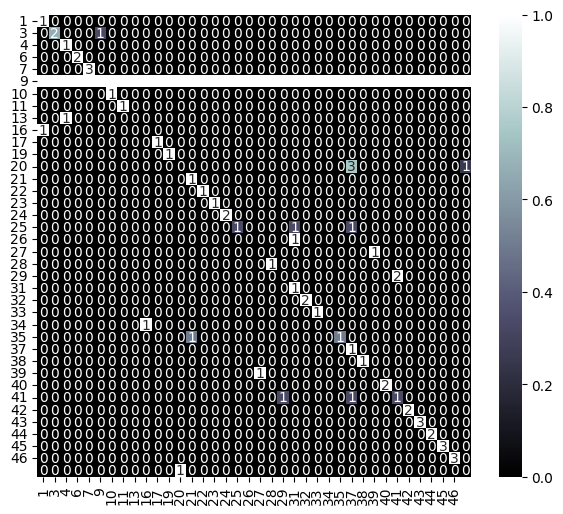

In [160]:
plot_confusion_matrix(xgb_model, X_test, y_test)